Blog von: https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

Overpass Turbo Abfrage: https://overpass-turbo.eu/s/1g8P

In [4]:
import requests
import json

overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-1"="CH"][admin_level=2];
(node["historic"="castle"](area);
 way["historic"="castle"](area);
 rel["historic"="castle"](area);
);
out center;
"""
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

print (data)

jsonDataFile = open("castle.json", "w")
jsonDataFile.write(json.dumps(data, indent=4, sort_keys=True))
jsonDataFile.close()



{'version': 0.6, 'generator': 'Overpass API 0.7.57 93a4d346', 'osm3s': {'timestamp_osm_base': '2022-02-18T10:17:25Z', 'timestamp_areas_base': '2022-02-18T08:37:54Z', 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'}, 'elements': [{'type': 'node', 'id': 100873503, 'lat': 47.5595606, 'lon': 8.5360561, 'tags': {'access': 'yes', 'alt_name': 'Pechpfannenhüsli', 'castle_type': 'tower', 'description': 'Hochwacht, 1655 zum festen Wachturm ausgebaut, 1812 aufgelassen.', 'historic': 'castle', 'historic:civilization': 'medieval', 'name': 'Hochwacht Rhinsberg', 'ruins': 'yes', 'start_date': 'C17', 'wikidata': 'Q101445889', 'wikipedia': 'de:Hochwacht Rhinsberg'}}, {'type': 'node', 'id': 259024613, 'lat': 47.4732192, 'lon': 8.3053033, 'tags': {'access': 'yes', 'castle_type': 'defensive', 'ele': '448', 'historic': 'castle', 'historic:civilization': 'medieval', 'name': 'Ruine Stein', 'name:de': 'Ruine Stein', 'name:gsw': 'Ruine Sch

Plot

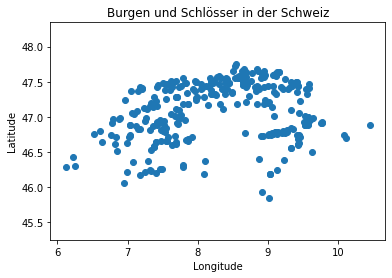

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))
    
# Convert coordinates into numpy array
X = np.array(coords)

plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Burgen und Schlösser in der Schweiz')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()